# 분석 주제

- 손흥민 선수를 중심으로 분석을 해보려한다.
- 손흥민 선수는 2015년도 부터 토트넘에서 활동중.

# Day - 2
- 손흥민 선수의 골과 어시기록을 합쳐 공격포인트 기록으로 분석

In [1]:
# 필요한 라이브러리 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# 전에 수집한 데이터들에서 2015년부터 2020년까지의 데이터 프레임을 생성.
year=['2015','2016','2017','2018','2019','2020']
years_data=['data_2015','data_2016','data_2017','data_2018','data_2019','data_2020']

In [3]:
def dataget(url): # 데이터 얻어오기
    df=pd.read_csv(url)
    return df

In [4]:
def indexdrop(data): # 중복 인덱스 삭제
    data.drop(['Unnamed: 0'],axis=1,inplace=True)
    return data

In [5]:
def goals(data,year): # 년도 별로 공격포인트(골+어시) 데이터 시각화 
   
    # 경기수가 28경기 이상인 선수만.
    filt =data['Apps']>=28
    goal_data=data[filt]
    
    # 손흥민 선수 데이터만 가져오기
    filt2=data['Player']=='Son Heung-Min'
    son=data[filt2]
    
    #그래프 그리기
    plt.figure(facecolor='#20283C')
    ax =plt.gca()
    ax.set_facecolor('#20283C')
    plt.scatter(goal_data['G']+goal_data['A'],goal_data['Apps'],s=200,alpha=0.7,c='#ECF0F1')
    plt.scatter(son['G']+son['A'],son['Apps'],s=700,marker='o',c="#FF0000")
    plt.text(son['G']+son['A'],son['Apps']+4,int(son['G']+son['A']),ha='center',c='r',size=20)
#    plt.text(son['G'],son['Apps']-7,"PercenTile Rank",ha='center',c='r',size=20)
    plt.yticks([10,60])
    plt.xticks([0,5,10,15,20,25,30,35])
    plt.tick_params(axis='y',direction='in',labelsize=0)
    plt.tick_params(axis='x',direction='out',labelsize=15,pad=5,length=10,color='#7B7D7D',labelcolor='#7B7D7D')
    plt.title(str(year)+'/'+str(year+1)+'_Goals+Assist',c='#7B7D7D',size=15)
    
    #이미지 파일로 저장하기.
    plt.savefig(str(year)+'goal+Assist_data.png',dpi=300)
    plt.show()

In [6]:
# 년도 별로 손흥민 선수의 데이터만 모으기 위한 함수.
son_data=pd.DataFrame(columns=['Player', 'Team', 'Apps', 'Min', 'G', 'A', 'xGChain', 'xGBuildup','xG90', 'xA90', 'xG90 + xA90'])
def son_df(data):
    filt2=data['Player']=='Son Heung-Min'
    son=data[filt2]
    return son

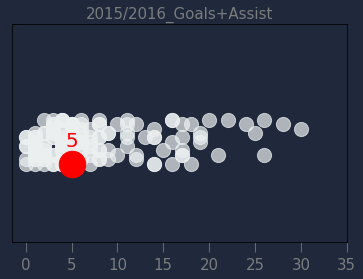

In [7]:
# 2015-2016년도.
data_2015=dataget('EPL_2015-2016_Player_data.csv')
data_2015= indexdrop(data_2015)
goals(data_2015,2015)
son_data=pd.concat([son_data,son_df(data_2015)],axis=0)

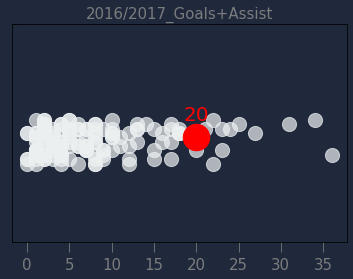

In [8]:
# 2016-2017년도.
data_2016=dataget('EPL_2016-2017_Player_data.csv')
data_2016= indexdrop(data_2016)
goals(data_2016,2016)
son_data=pd.concat([son_data,son_df(data_2016)],axis=0)

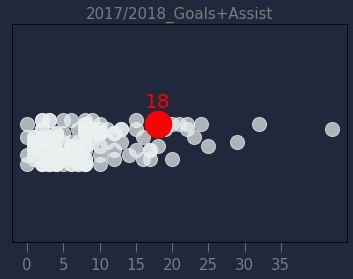

In [9]:
# 2017-2018년도.
data_2017=dataget('EPL_2017-2018_Player_data.csv')
data_2017= indexdrop(data_2017)
goals(data_2017,2017)
son_data=pd.concat([son_data,son_df(data_2017)],axis=0)

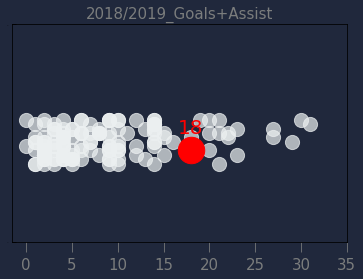

In [10]:
# 2018-2019년도.
data_2018=dataget('EPL_2018-2019_Player_data.csv')
data_2018= indexdrop(data_2018)
goals(data_2018,2018)
son_data=pd.concat([son_data,son_df(data_2018)],axis=0)

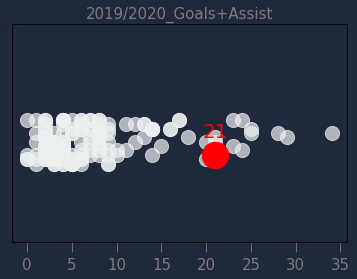

In [11]:
# 2019-2020년도.
data_2019=dataget('EPL_2019-2020_Player_data.csv')
data_2019= indexdrop(data_2019)
goals(data_2019,2019)
son_data=pd.concat([son_data,son_df(data_2019)],axis=0)

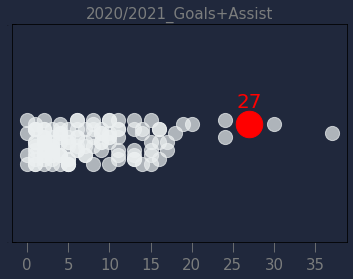

In [12]:
# 2020-2021년도.
data_2020=dataget('EPL_2020-2021_Player_data.csv')
data_2020= indexdrop(data_2020)
goals(data_2020,2020)
son_data=pd.concat([son_data,son_df(data_2020)],axis=0)

### 위에서 분석한 그래프를 보면 손흥민 선수는 2019/2020 시즌에 커리어 하이를 달성  그리하여 2019/2020시즌을 손흥민 선수에 대하여 집중적으로 분석

- 골 결정력을 분석해볼 예정  
    1. Apps = Min/90을 통해 실제로 선수가 뛴 경기 시간을 비례해 평균 경기수 계산.  
    2. G_90 = G/Apps을 통해 경기당 골수를 계산  
    3. G_xg = G_90/xg90을 통해 골 결정력 계산(xg90은 선수가 1경기(90분)당 골을 넣을 기대값이다.)

In [17]:
# G_xg 값을 구하여 컬럼으로 추가..
data_2020['G_xg']=(data_2020['G']/(data_2020['Min']/90))/data_2020['xG90']

In [18]:
# data_2020의 평균 값 알아보기
data_2020.describe()

,Apps,Min,G,A,xGChain,xGBuildup,xG90,xA90,xG90 + xA90,G_xg
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,287.000000
mean,24.606667,1787.286667,3.286667,1.973333,8.104867,4.563967,0.172867,0.101667,0.274567,inf
std,9.251157,892.271899,3.882620,2.461603,5.938098,3.553909,0.167263,0.085921,0.214411,NaN
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1135.750000,1.000000,0.000000,3.557500,1.977500,0.050000,0.030000,0.100000,0.703955
50%,26.000000,1801.000000,2.000000,1.000000,7.030000,3.645000,0.105000,0.090000,0.210000,1.035614
75%,32.000000,2531.000000,4.000000,3.000000,10.700000,6.565000,0.252500,0.160000,0.410000,1.487725
max,38.000000,3420.000000,23.000000,14.000000,28.970000,18.970000,0.640000,0.490000,0.940000,inf


In [19]:
# 평균인 1787 분 이상 뛴 선수의 데이터
filt=data_2020['Min']>1787
df_2020=data_2020[filt]

In [22]:
# G_xg에 non값애들은 삭제
df_2020.dropna()

,Player,Team,Apps,Min,G,A,xGChain,xGBuildup,xG90,xA90,xG90 + xA90,G_xg
0,Harry Kane,Tottenham,35.0,3097.0,23,14,25.00,4.45,0.64,0.22,0.86,1.044357
1,Mohamed Salah,Liverpool,37.0,3085.0,22,5,28.97,9.80,0.59,0.19,0.78,1.087822
2,Bruno Fernandes,Manchester United,37.0,3117.0,18,12,26.91,11.93,0.46,0.33,0.79,1.129849
3,Son Heung-Min,Tottenham,37.0,3139.0,17,10,20.67,6.61,0.32,0.27,0.59,1.523176
4,Patrick Bamford,Leeds,38.0,3085.0,17,7,23.39,4.13,0.54,0.11,0.65,0.918422
...,...,...,...,...,...,...,...,...,...,...,...,...
262,Joël Veltman,Brighton,28.0,2281.0,1,1,9.02,6.80,0.05,0.07,0.12,0.789128
263,Liam Cooper,Leeds,25.0,2189.0,1,0,7.38,7.38,0.09,0.00,0.09,0.456830
265,Rúben Dias,Manchester City,32.0,2848.0,1,0,16.68,16.56,0.06,0.00,0.07,0.526685
284,Aaron Cresswell,West Ham,36.0,3176.0,0,8,10.62,8.39,0.03,0.21,0.23,0.000000


In [24]:
df_2020.sort_values('G_xg',ascending=False)
#문제점: 특히 수비수 같은 경우는 xg90값이 굉장히 낮을수 밖에 없다. 그래서 G_xg값이
#너무 눂게 나오므로 조건을추가.

,Player,Team,Apps,Min,G,A,xGChain,xGBuildup,xG90,xA90,xG90 + xA90,G_xg
200,Alisson,Liverpool,33.0,2970.0,1,0,3.56,3.56,0.00,0.00,0.00,inf
175,Kyle Walker,Manchester City,24.0,1944.0,1,1,10.60,10.21,0.01,0.02,0.03,4.629630
261,Kalvin Phillips,Leeds,29.0,2435.0,1,2,8.96,7.55,0.01,0.12,0.13,3.696099
142,Jairo Riedewald,Crystal Palace,33.0,1803.0,2,0,3.51,2.33,0.03,0.04,0.07,3.327787
222,Jan Bednarek,Southampton,36.0,3111.0,1,1,8.54,8.49,0.01,0.03,0.05,2.892960
...,...,...,...,...,...,...,...,...,...,...,...,...
270,Bernd Leno,Arsenal,35.0,3136.0,0,0,4.33,4.33,0.00,0.00,0.00,NaN
279,Joel Ward,Crystal Palace,26.0,2252.0,0,1,3.12,2.89,0.00,0.02,0.02,NaN
287,David de Gea,Manchester United,26.0,2298.0,0,0,2.11,2.11,0.00,0.00,0.00,NaN
297,Alex McCarthy,Southampton,30.0,2700.0,0,0,2.76,2.76,0.00,0.00,0.00,NaN


In [25]:
df_2020.describe()

,Apps,Min,G,A,xGChain,xGBuildup,xG90,xA90,xG90 + xA90,G_xg
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,146.000000
mean,31.384106,2540.536424,4.516556,2.867550,11.376490,6.602318,0.162053,0.102252,0.264106,inf
std,4.607039,454.629428,4.617148,2.958999,6.099099,3.597841,0.162822,0.089496,0.220509,NaN
min,20.000000,1800.000000,0.000000,0.000000,2.110000,1.050000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,2161.000000,1.000000,0.000000,6.950000,3.620000,0.045000,0.030000,0.085000,0.742974
50%,32.000000,2529.000000,2.000000,2.000000,10.230000,6.200000,0.090000,0.090000,0.180000,1.058237
75%,35.000000,2882.500000,6.500000,5.000000,15.235000,8.725000,0.240000,0.160000,0.405000,1.457068
max,38.000000,3420.000000,23.000000,14.000000,28.970000,18.970000,0.640000,0.490000,0.940000,inf


In [36]:
# 평균적으로 4.5골과 평균 xg90이 0.16이상인 선수만 추리겠다.-> 대략 공격적인 선수를 추리기 위해
filt=(df_2020['G']>5)  & (df_2020['xG90']> 0.16)
df_2020=df_2020[filt]

In [54]:
#상위 20명을 뽑기위해 G_xg 값을 기준으로 내림차순 정렬
df_2020=df_2020.sort_values('G_xg',ascending =False)
df_2020_2=df_2020.head(20)

In [101]:
# 그래프를 그릴떼 내림차순으로 하도록 다시 정렬 및 G_xg 소수 둘째 자리까지
df_2020_2=df_2020_2.sort_values('G_xg')
df_2020_2=df_2020_2.round({'G_xg':2})

#손흥민 선수 데이터만 수집.
filt = df_2020_2['Player']=='Son Heung-Min'
df_son=df_2020_2[filt]
df_son=df_son.round({'G_xg':2})

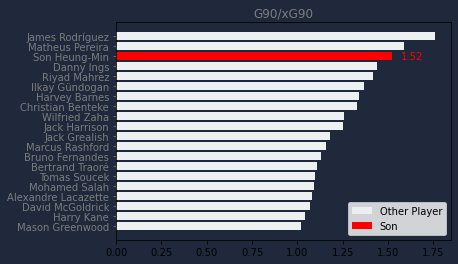

In [114]:
# 그래프 그리기.
plt.figure(facecolor='#20283C')
ax =plt.gca()
ax.set_facecolor('#20283C')
plt.barh(df_2020_2['Player'],df_2020_2['G_xg'],color='#ECF0F1',label='Other Player')
plt.tick_params(axis='y',color='#7B7D7D',labelcolor='#7B7D7D')
plt.barh(df_son['Player'],df_son['G_xg'],color='red',label='Son')
plt.title('G90/xG90',color='#7B7D7D')
plt.text(df_son['G_xg']+0.05,df_son['Player'],float(df_son['G_xg']),c='r',va='center')
plt.legend()
plt.savefig('test_1.png',dpi=300,bbox_inches='tight')
plt.show()

### 손흥민 선수는 1.52 수치로 3번쨰로 기대 골에 비해 골을 잘넣는 선수이다.

### 이번엔 실제 골 기록 이용해서 더해서 산점도 그래프로 그려 분석하여 위에서 분석한 데이터를 바탕으로 누가 훌룡한 공격수인지 분석

In [178]:
df_2020=df_2020.reset_index()

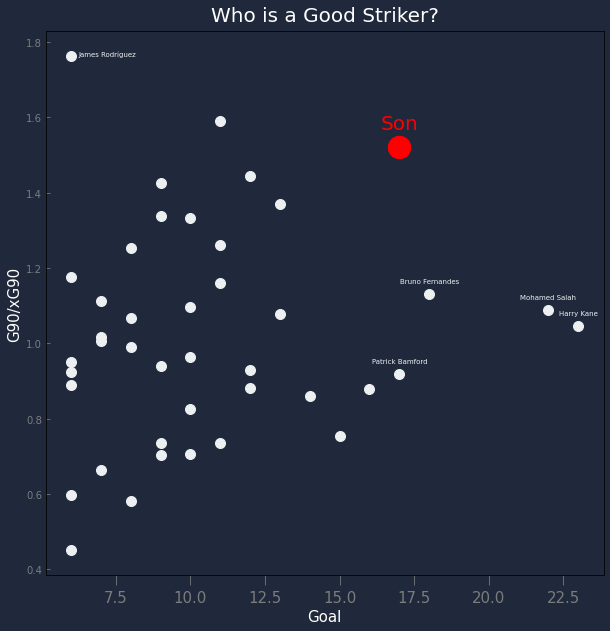

In [202]:
plt.figure(facecolor='#20283C',figsize=(10,10))
ax =plt.gca()
ax.set_facecolor('#20283C')
plt.scatter(df_2020['G'],df_2020['G_xg'],c='#ECF0F1',s=100)
plt.scatter(df_son['G'],df_son['G_xg'],c='r',s=500)
plt.title('Who is a Good Striker?',color='w',size=20,pad=10)
plt.tick_params(axis='y',direction='in',color='#7B7D7D',labelcolor='#7B7D7D')
plt.tick_params(axis='x',direction='out',labelsize=15,pad=5,length=10,color='#7B7D7D',labelcolor='#7B7D7D')

# 상위 선수들 텍스트.
plt.text(df_son['G'],df_son['G_xg']+0.05,'Son',ha='center',c='r',size=20)
plt.text(df_2020['G'][0]+1.2,df_2020['G_xg'][0],df_2020['Player'][0],ha='center',c='#ECF0F1',size=7)
plt.text(data_2020['G'][0],data_2020['G_xg'][0]+0.03,data_2020['Player'][0],ha='center',c='#ECF0F1',size=7)
plt.text(data_2020['G'][1],data_2020['G_xg'][1]+0.03,data_2020['Player'][1],ha='center',c='#ECF0F1',size=7)
plt.text(data_2020['G'][2],data_2020['G_xg'][2]+0.03,data_2020['Player'][2],ha='center',c='#ECF0F1',size=7)
plt.text(data_2020['G'][4],data_2020['G_xg'][4]+0.03,data_2020['Player'][4],ha='center',c='#ECF0F1',size=7)

plt.xlabel('Goal',color='w',size=15)
plt.ylabel('G90/xG90',color='w',size=15)
plt.savefig('GoodStriker.png',dpi=300)
plt.show()

### 위에서 분석한 것과 같이 2020/2021의 손흥민은 굉장히 좋은 공격수였다.   무엇이 저렇게 좋은 결과를 나타나게 하였을까?  세부 기록을 분석해보기로 하였다.

세부기록은 이곳에서 사용한 언더스탯 홈페이지 데이터로는 부족하다. 그러므로 언더스탯보다는 세부기록을 위주로 나와있는 후드스코어 의 홈페이지를 다시한번 스크래핑하여 데이터를 수집하고 분석하기로 하였다.